> Trabalho feito por Benson Terra, Francisco Gameiro e Pedro Maia

## Introdução

Este projeto tem como objetivo o recurso a tecnologias abordadas na Unidade Curricular (UC) de **Inteligência Artificial** na [Licenciatura em Tecnologias e Sistemas de Informação para a Web](https://www.esmad.ipp.pt/cursos/licenciatura/663) da ESMAD.
No âmbito da UC, foi proposto a realização de um projeto que
- Classifique o tipo de vinho;
- Faça a aferição da qualidade do vinho através da investigação dos seus fatores químicos.
Em ambos os requisitos é utilizado um *dataset* único com todos os dados essenciais de cada vinho.

## Análise e Tratamento de Dados

### *Imports* necessários

In [1]:
import pandas as pd
# Biblioteca utilizada na análise de dados
import matplotlib.pyplot as plt
# Biblioteca utilizada na griação de gráficos
import numpy as np

import seaborn as sns
# Biblioteca utilizada na vizualização de dados

### Uso do *dataset*

In [2]:
df = pd.read_csv("VinhoClassReg.csv")

### Análise do *dataset*

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Considerações:
- O dataset contém:
    - Tipo de vinho (`type`)
    - Propriedades químicas:
        - Acidez fixa (`fixed acidity`)
        - Acidez volátil (`volatile acidity`)
        - Níveis de ácido cítrico (`citric acid`)
        - Quantidade de acúcar (`residual sugar`)
        - Quantidade de clorídricos (`chlorides`)
        - (`free sulfur dioxide`)
        - (`total sulfur dioxide`)
        - Densidade (`density`)
        - Nível do pH (`pH`)
        - Quantidade de sulfatos (`sulphates`)
        - Quantidade de álcool (`alcohol`)
    - Nível de qualidade (`quality`)
        - 0 - 10

#### Análise das colunas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

Considerações:
- Quase todas as colunas são de tipos numéricos, com a exceção da coluna `type`;
- Todas as colunas correspondentes a propriedades químicas são do tipo *`float64`*, ou seja, são números flutuantes. Os valores dessas colunas poderão estar em um *scaler*.
- As colunas `type` e `quality` serão as *targets* para ambos os objetivos do projeto. Senso assim, não deverão ser alteradas.

### Análise de buracos nos dados

In [7]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
print(f'Nº de vinhos: {len(df)}')

Nº de vinhos: 6497


Considerações:
- Diante da quantidade de vinhos existentes no *dataset* (6497), o nº de linhas onde existem tais buracos é residual. Por isso, basta apagar as linhas onde se existam tais buracos.

### Análise de correlações

<Axes: >

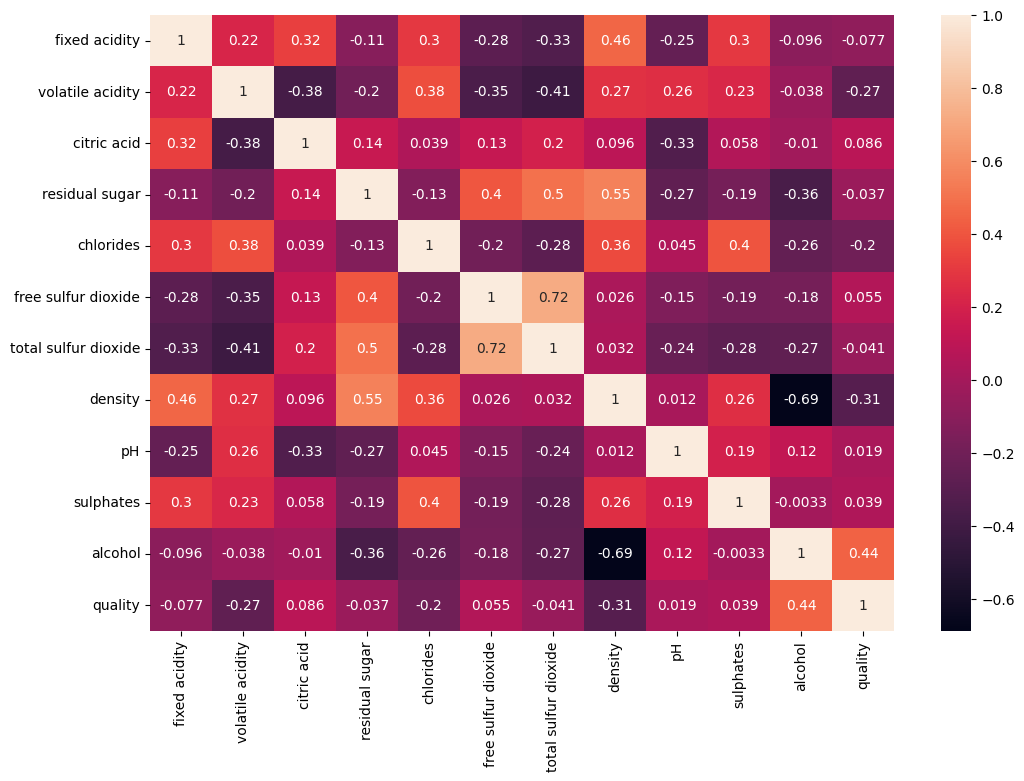

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(df.drop(['type'], axis = 1).corr(), annot=True)

### Análise no balanceamento dos dados

In [10]:
df.type.value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

Considerações:
- Existe um desbalançeamento enorme nos dados adquiridos, favorecendo mais o vinho branco
- Pode-se fazer recurso a métodos de balancemanto e posteriormente ver se a perfomance de um modelo terá melhorado ou não.

# Pre-processamento

### Apagar linhas com buracos nos dados

#### Fixed acity

In [11]:
coluna = "fixed acidity"

In [12]:
df[df[coluna].isna()] 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5
368,white,NaN,0.290,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,6
518,white,NaN,0.130,0.28,1.9,0.050,20.0,78.0,0.99180,3.43,0.64,10.8,6
1079,white,NaN,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6
2902,white,NaN,0.360,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,NaN,9.4,5
6428,red,NaN,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6
6429,red,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5


In [13]:
df = df[df[coluna].notna()]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Volatile acidity

In [14]:
coluna = "volatile acidity"

In [15]:
df[df[coluna].isna()] 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
521,white,7.9,NaN,0.26,2.1,0.039,8.0,143.0,0.99420,3.05,0.74,9.8,5
621,white,6.5,NaN,0.43,8.9,0.083,50.0,171.0,0.99650,2.85,0.50,9.0,5
812,white,6.4,NaN,0.28,1.1,0.055,9.0,160.0,0.99405,3.42,0.50,9.1,7
2894,white,6.4,NaN,0.36,1.4,0.044,22.0,68.0,0.99014,3.15,0.50,11.7,7
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6486,red,7.2,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


In [16]:
df = df[df[coluna].notna()]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### citric acid

In [17]:
coluna = "citric acid"

In [18]:
df[df[coluna].isna()] 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
268,white,5.3,0.585,NaN,7.1,0.044,34.0,145.0,0.9945,3.34,0.57,9.7,6
909,white,7.5,0.240,NaN,13.0,0.049,46.0,217.0,0.9985,3.08,0.53,8.8,5
6320,red,7.0,0.540,NaN,2.1,0.079,39.0,55.0,0.9956,3.39,0.84,11.4,6


In [19]:
df = df[df[coluna].notna()]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### residual sugar

In [20]:
coluna = "residual sugar"

In [21]:
df[df[coluna].isna()] 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.9939,3.42,0.51,9.0,6
438,white,7.4,0.155,0.34,NaN,0.045,73.5,214.0,0.9934,3.18,0.61,9.9,7


In [22]:
df = df[df[coluna].notna()]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### chlorides

In [23]:
coluna = "chlorides"

In [24]:
df[df[coluna].isna()] 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,white,9.8,0.36,0.46,10.5,NaN,4.0,83.0,0.9956,2.89,0.30,10.1,4
747,white,7.2,0.29,0.40,7.6,NaN,56.0,177.0,0.9928,3.04,0.32,11.5,6


In [25]:
df = df[df[coluna].notna()]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### pH

In [26]:
coluna = "pH"

In [27]:
df[df[coluna].isna()] 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
54,white,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
139,white,8.1,0.28,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
440,white,6.7,0.22,0.37,1.6,0.028,24.0,102.0,0.99130,NaN,0.59,11.6,7
587,white,6.1,0.32,0.25,1.7,0.034,37.0,136.0,0.99200,NaN,0.50,10.8,7
697,white,7.5,0.31,0.51,14.8,0.039,62.0,204.0,0.99820,NaN,0.60,9.5,5
972,white,6.8,0.22,0.35,17.5,0.039,38.0,153.0,0.99940,NaN,0.42,9.0,6
4892,white,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,NaN,0.54,9.7,5


In [28]:
df = df[df[coluna].notna()]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### sulphates

In [29]:
coluna = "sulphates"

In [30]:
df[df[coluna].isna()] 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
6321,red,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,NaN,11.0,4
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6


In [31]:
df = df[df[coluna].notna()]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Uso de um *ordinal encoder*

#### type

In [32]:
coluna = "type"

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df[coluna]=enc.fit_transform(df[[coluna]])
df

C:\Users\benso\AppData\Local\Temp\ipykernel_7280\3802713544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna]=enc.fit_transform(df[[coluna]])


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1.0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1.0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1.0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Nota:
- 1 - branco
- 2 - tinto

# Dataset organizado

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [35]:
X=df.drop([coluna], axis=1)
y=df[coluna]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=24)

In [37]:
def evaluate(reais, previstos):
    _accuracy = accuracy_score(y_true=reais,y_pred=previstos)
    _f1 = f1_score(reais, previstos, average='weighted')
    return round(_accuracy, 4), round(_f1, 4)

def print_evaluate(model, reais, previstos):
    accuracy, f1 = evaluate(reais,previstos)
    print("------------------------------------------")
    print("Accuracy: ", accuracy)
    print("F1: ", f1)
    print("------------------------------------------")

    results=np.array([model,accuracy,f1])
    results_df.loc[len(results_df)+1]= results

results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1'])

In [38]:
from time import time
from sklearn.model_selection import GridSearchCV

def grid_search(model, params):
    GSCV = GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=5,
                        n_jobs=-1,
                        verbose=2
                       ) 
    start=time()
    GSCV.fit(X_train,y_train)
    grid_time=time()-start
    print("Grid time: ", grid_time)
    print(GSCV.best_params_)
    return GSCV.best_params_

## Determinação do tipo de vinho.

### RF

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state = 24)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

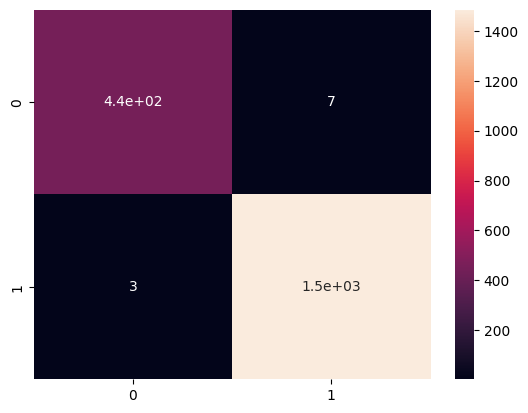

In [41]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot = True)
plt.show()

In [42]:
print("RFC:")
print_evaluate("RFC", y_test,rf_pred)

RFC:
------------------------------------------
Accuracy:  0.9948
F1:  0.9948
------------------------------------------


#### Otimização

In [43]:
%%time
rf_params = {
    'max_depth': [None, 3, 5, 8, 10],
    'max_features': ['sqrt', 'log2', None, 3, 5, 10],
    'n_estimators': [2, 5, 10 ,50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

rf_cv_model = GridSearchCV(RandomForestClassifier(random_state=24),
                          rf_params, cv = 10, n_jobs = -1, verbose = 1)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 540 candidates, totalling 5400 fits
CPU times: total: 12.7 s
Wall time: 4min 4s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=24),
             n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 8, 10],
                         'max_features': ['sqrt', 'log2', None, 3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 5, 10, 50, 100, 200]},
             verbose=1)

In [44]:
rf_cv_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [45]:
rf2 = RandomForestClassifier(
    random_state = 24,
    n_estimators = rf_cv_model.best_params_['n_estimators'],
    max_depth = rf_cv_model.best_params_['max_depth'],
    max_features = rf_cv_model.best_params_['max_features'],
    min_samples_split = rf_cv_model.best_params_['min_samples_split'],
)

rf2.fit(X_train, y_train)
rf2_pred = rf2.predict(X_test)

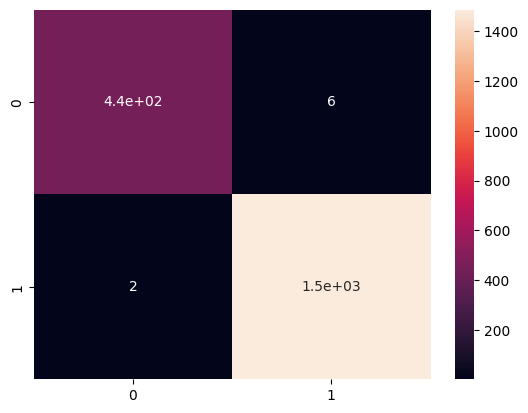

In [46]:
sns.heatmap(confusion_matrix(y_test, rf2_pred), annot = True)
plt.show()

In [47]:
print("RFC Optimized:")
print_evaluate("RFC Optimized", y_test,rf2_pred)

RFC Optimized:
------------------------------------------
Accuracy:  0.9959
F1:  0.9959
------------------------------------------


In [48]:
results_df

,Model,Accuracy,F1
1,RFC,0.9948,0.9948
2,RFC Optimized,0.9959,0.9959


### Decision tree

In [49]:
from sklearn import tree

In [51]:
t=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=24)
t=t.fit(X_train,y_train)
t_pred = t.predict(X_test)

In [53]:
t.score(X_test,y_test)

0.9860752965446106

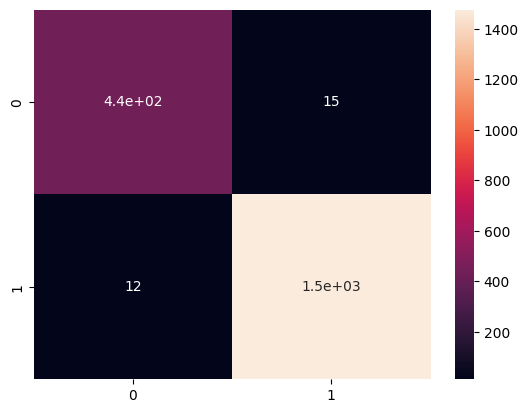

In [52]:
sns.heatmap(confusion_matrix(y_test, t_pred), annot = True)
plt.show()

In [54]:
print("Decision tree:")
print_evaluate("Decision tree", y_test,t_pred)

Decision tree:
------------------------------------------
Accuracy:  0.9861
F1:  0.9861
------------------------------------------


#### Otimização

In [55]:
parameters={
    'max_depth': (6,7,8,10,20),
    'min_samples_leaf': (1,2,5),
    'min_samples_split': (2,5,10)
}

grid_search=GridSearchCV(t,parameters,n_jobs=-1,verbose=1,scoring='f1')
grid_search.fit(X_train,y_train)
print('Best parameters: ')

best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r'%(param_name,best_parameters[param_name]))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: 
	max_depth: 10
	min_samples_leaf: 1
	min_samples_split: 5


In [56]:
best_parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 24,
 'splitter': 'best'}

In [57]:
t=tree.DecisionTreeClassifier(criterion='entropy',
                              max_depth=best_parameters['max_depth'],
                              min_samples_leaf=best_parameters['min_samples_leaf'],
                              min_samples_split=best_parameters['min_samples_split'],
                              random_state=24)
t=t.fit(X_train,y_train)
t=t.fit(X_test,y_test)

In [ ]:
# imprimir acurácia em treino e teste
print("Acurácia em treino: ", accuracy_score(y_true=y_train,y_pred=t.predict(X_train)))
print("Acurácia em teste: ",accuracy_score(y_true=y_test,y_pred=t.predict(X_test)))

In [ ]:
dt_accuracy = accuracy_score(y_true=y_test,y_pred=t.predict(X_test))
dt_f1 = f1_score(y_test, t.predict(X_test), average='weighted')
results_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1'], data = [['DT - Otimizado', dt_accuracy, dt_f1]])
results_df

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(50,20))
plot_tree(t,fontsize=10,rounded=True)
plt.show()

### SVC

#### *Imports*

In [ ]:
from sklearn.svm import SVC
# Modelo SVC


#### Criação do modelo

In [ ]:
clf_svc = SVC()

#### Treino

In [ ]:
score_svc = cross_val_score(clf_svc, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [ ]:
score_svc, score_svc.mean()

In [ ]:
clf_svc = clf_svc.fit(X_train, y_train)

#### Testes

In [ ]:
svc_pred = clf_svc.predict(X_test)

In [ ]:
cm_svc = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm_svc, annot=True)

In [ ]:
svc_accuracy = accuracy_score(y_test, svc_pred)

In [ ]:
svc_f1 = f1_score(y_test, svc_pred, average = 'weighted')
print("f1 score: {}".format(svc_f1))

In [ ]:
svc_f1 = f1_score(y_test, svc_pred, average='weighted')
results_svc = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1'], data = [['SVC - Não optimizado', svc_accuracy, svc_f1]])
results_svc

#### Optimização

##### Obtenção dos parâmetros usados no modelo original

In [ ]:
clf_svc.get_params()

##### Criação de um modelo otimizado

In [ ]:
def grid(model, parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv=3, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    return grid.best_score_, grid.best_estimator_.get_params()

In [ ]:
parameters_svc = {'C': [0.9,0.01], 'kernel':['rbf', 'linear'], 'gamma':['scale', 'auto', 0.1]}
best_score_svc, best_params_svc = grid(clf_svc, parameters_svc)
print(f'Melhor acurácia obtida: {best_score_svc}')

In [ ]:
best_params_svc

##### Treino e testes

In [ ]:
clf_svc2 = SVC(C=0.9, kernel = 'linear', gamma = 'scale')
clf_svc2 = clf_svc2.fit(X_train, y_train)
svc_pred2 = clf_svc2.predict(X_test)

##### resultados

In [ ]:
cm2 = confusion_matrix(y_test, svc_pred2)
sns.heatmap(cm2, annot=True)

In [ ]:
svc_accuracy = accuracy_score(y_test, svc_pred2)

In [ ]:
svc_f1 = f1_score(y_test, svc_pred2, average = 'weighted')
print("f1 score: {}".format(svc_f1))

In [ ]:
svc_f1 = f1_score(y_test, svc_pred2, average='weighted')
results_svc = pd.DataFrame(columns = ['Model', 'Accuracy', 'F1'], data = [['SVC - Otimizado', svc_accuracy, svc_f1]])
results_svc

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr_pred= lr.predict(X_test)

In [ ]:
plt.scatter(y_test, lr_pred, s=1)

In [ ]:
sns.displot((y_test-lr_pred))